In [479]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import Queue


def bfs(g):
    q = Queue()
    q.put("")
    
    depth = {}
    depth[""] = 0
    while not q.empty():
        u = q.get()
        for v in g.adj[u]:
            if not v in depth or depth[v] < depth[u] + 1:
                q.put(v)
                depth[v] = depth[u] + 1
    return depth


def rotate(s):
    result = [[v for v, d in s.items() if d == depth] for depth in range(max(s.values()) + 1)]
    return result


def get_pos(r):
    result = {}
    W = 1000
    for layer, ls in enumerate(r):
        x = 0
        w = W / len(ls)
        for v in ls:
            result[v] = (10 * layer + w * x, -layer * 10)
            x += 1
    return result


def tokenize_line(line):
    result = set()
    cur_token = ""
    for c in line:
        if c.isalnum() or c in "_":
            cur_token += c
        elif cur_token != "":
            result.add(cur_token)
            cur_token = ""
    if cur_token != "":
        result.add(cur_token)
    return set(filter(lambda t: t[0].isalpha(), result))


def get_vars_used(vars, line):
    result = set(vars.keys()) & tokenize_line(line)
    if len(result) != 0:
        mp = {var: vars[var] for var in result}
        print(f"used vars: {mp}")
    return result


def print_source(source):
    for num, line in enumerate(source.split("\n"), start=1):
        print(f"{num}: {line}")

        
def process(source):
    print_source(source)
    print()
    lines = source.split("\n")
    vars = {}
    g = nx.DiGraph()
    for num, line in enumerate(lines, start=1):
        if " = " in line:
            var_name, value = line.split(" = ")
            vars[var_name.strip(" ")] = line
            print(f"{num}: {var_name} := {value}")
            used_vars = get_vars_used(vars, value)
            for var in used_vars:
                g.add_edge(vars[var], line)
        elif " in " in line:
            var_name, value = line.split(" in ")
            var_name = var_name[4:]
            vars[var_name.strip(" ")] = line
            print(f"{num}: for {var_name} in {value}")
            used_vars = get_vars_used(vars, value)
            for var in used_vars:
                g.add_edge(vars[var], line)
        elif " += " in line:
            var_name, value = line.split(" += ")
            var_name = var_name.strip()
            print(f"{num}: {var_name} += {value}")
            used_vars = get_vars_used(vars, value)
            used_vars.add(var_name)
            for var in used_vars:
                g.add_edge(vars[var], line)
        elif " *= " in line:
            var_name, value = line.split(" *= ")
            var_name = var_name.strip()
            print(f"{num}: {var_name} *= {value}")
            used_vars = get_vars_used(vars, value)
            used_vars.add(var_name)
            for var in used_vars:
                g.add_edge(vars[var], line)
        else:
            print(f"{num}: {line}")
            used_vars = get_vars_used(vars, line)
            for var in used_vars:
                g.add_edge(vars[var], line)
    g.add_node("")
    e = set()
    for line in lines:
        g.add_node(line)
    for line in lines:
        for v in g.adj[line]:
            e.add(v)
    for line in lines:
        if not line in e:
            g.add_edge("", line)
    pos = get_pos(rotate(bfs(g)))
    g.remove_node("")
    nx.draw(g, pos=pos, with_labels=True, node_color='white', edge_color='black' ,width=2)

In [480]:
source1 = """a = 1
b = f(a)
c = 4
d = g(a, c)
perform(b, d)"""
source2 = """n = 4
a = 1
b = 0
for i in range(1, n + 1):
    x = i * i
    a *= i
    b += x"""

1: a = 1
2: b = f(a)
3: c = 4
4: d = g(a, c)
5: perform(b, d)

1: a := 1
2: b := f(a)
used vars: {'a': 'a = 1'}
3: c := 4
4: d := g(a, c)
used vars: {'c': 'c = 4', 'a': 'a = 1'}
5: perform(b, d)
used vars: {'d': 'd = g(a, c)', 'b': 'b = f(a)'}


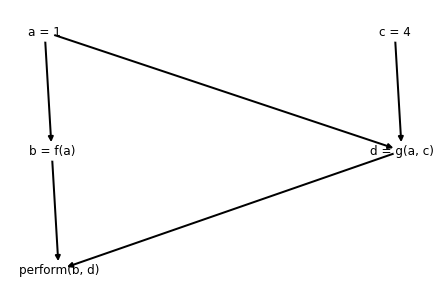

In [481]:
process(source1)

1: n = 4
2: a = 1
3: b = 0
4: for i in range(1, n + 1):
5:     x = i * i
6:     a *= i
7:     b += x

1: n := 4
2: a := 1
3: b := 0
4: for i in range(1, n + 1):
used vars: {'n': 'n = 4'}
5:     x := i * i
used vars: {'i': 'for i in range(1, n + 1):'}
6: a *= i
used vars: {'i': 'for i in range(1, n + 1):'}
7: b += x
used vars: {'x': '    x = i * i'}


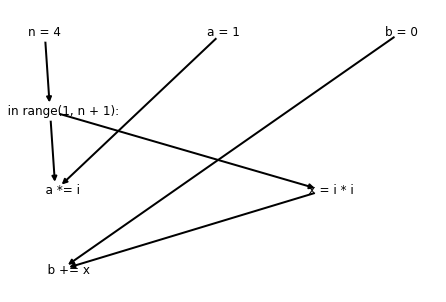

In [482]:
process(source2)

1: a1 = 1
2: a2 = 2
3: a3 = 3
4: a4 = 4
5: a5 = 5
6: a6 = 6
7: a7 = 7
8: a8 = 8
9: b1 = a1 + a2
10: b2 = a3 + a4
11: b3 = a5 + a6
12: b4 = a7 + a8
13: c1 = b1 + b2
14: c2 = b3 + b4
15: d1 = c1 + c2

1: a1 := 1
2: a2 := 2
3: a3 := 3
4: a4 := 4
5: a5 := 5
6: a6 := 6
7: a7 := 7
8: a8 := 8
9: b1 := a1 + a2
used vars: {'a1': 'a1 = 1', 'a2': 'a2 = 2'}
10: b2 := a3 + a4
used vars: {'a3': 'a3 = 3', 'a4': 'a4 = 4'}
11: b3 := a5 + a6
used vars: {'a5': 'a5 = 5', 'a6': 'a6 = 6'}
12: b4 := a7 + a8
used vars: {'a8': 'a8 = 8', 'a7': 'a7 = 7'}
13: c1 := b1 + b2
used vars: {'b2': 'b2 = a3 + a4', 'b1': 'b1 = a1 + a2'}
14: c2 := b3 + b4
used vars: {'b4': 'b4 = a7 + a8', 'b3': 'b3 = a5 + a6'}
15: d1 := c1 + c2
used vars: {'c2': 'c2 = b3 + b4', 'c1': 'c1 = b1 + b2'}


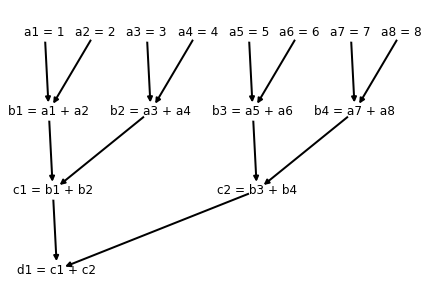

In [483]:
source = """a1 = 1
a2 = 2
a3 = 3
a4 = 4
a5 = 5
a6 = 6
a7 = 7
a8 = 8
b1 = a1 + a2
b2 = a3 + a4
b3 = a5 + a6
b4 = a7 + a8
c1 = b1 + b2
c2 = b3 + b4
d1 = c1 + c2"""
process(source)